In [1]:
%load_ext blackcellmagic

In [2]:
import cv2
import glob
import sys
import pickle
import matplotlib.pyplot as plt
from itertools import takewhile
import numpy as np

In [3]:
filenames = glob.glob("../DataSets/Cats_and_Dogs/*")

In [ ]:
def generate_basic_metadata(filenames):
    
    num_files = len(filenames)
    image_metadata = {}
    
    for i, filename in enumerate(filenames):

        image = cv2.imread(filename)
        height, width, channels = image.shape
        std, mean, min, max, sum = (
            image.std(),
            image.mean(),
            image.min(),
            image.max(),
            image.sum(),
        )

        image_metadata[filename] = {
            "height": height,
            "width": width,
            "channels": channels,
            "std": std,
            "mean": mean,
            "min": min,
            "max": max,
            "sum": sum,
        }
        
        sys.stdout.write("\r{:.2f}%".format(100*(i + 1) / num_files))
    sys.stdout.write("\r\n")
    return image_metadata


In [ ]:
%%time
metadata = generate_basic_metadata(filenames)

***
**MacBook**

CPU times: user 6min 45s, sys: 23.9 s, total: 7min 9s
Wall time: 3min 40s


**m4 Instance**

CPU times: user 2min 12s, sys: 1.72 s, total: 2min 14s
Wall time: 2min 11s

In [4]:
def save_obj(obj, name):
    with open("obj/" + name + ".pkl", "wb") as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open("obj/" + name + ".pkl", "rb") as f:
        return pickle.load(f)


In [ ]:
save_obj(metadata, 'metadata')

In [5]:
metadata_loaded = load_obj('metadata')

In [ ]:
areas = []
for filename, image_metadata in metadata_loaded.items():
    area = image_metadata["height"] * image_metadata["width"]
    areas.append(area)

In [ ]:
plt.hist(areas, bins=50, )
plt.show()

In [ ]:
np.std(areas)

In [ ]:
np.mean(areas)

In [ ]:
int(np.floor(np.sqrt(np.mean(areas))))

scale shorter dimension to (388)
make image square (ceneterd)

In [ ]:
a, b = 400, 800

In [ ]:
388 / 400

In [ ]:
800 * (388 / 400)

In [ ]:
heights, widths = [], []
for filename, image_metadata in metadata_loaded.items():
    height, width = image_metadata["height"], image_metadata["width"]
    heights.append(height)
    widths.append(width)

In [ ]:
plt.hist(heights, bins=50, )
plt.show()

In [ ]:
plt.hist(widths, bins=50, )
plt.show()

In [ ]:
one_image = cv2.imread(filenames[0])
plt.imshow(one_image)

In [6]:
def get_image_name_from_path(path):
    s = path[::-1]
    return "".join(takewhile(lambda x: x != "/", s))[::-1]

In [6]:
def normalize_image_areas(filenames, metadata):

    num_files = len(filenames)

    # TODO: area computation should be part of metadata generation
    areas = []

    for filename, image_metadata in metadata_loaded.items():

        area = image_metadata["height"] * image_metadata["width"]
        areas.append(area)

    mean_area = np.mean(area)
    new_side_len = int(np.sqrt(mean_area))

    for i, filename in enumerate(filenames):

        image = cv2.imread(filename)
        height, width, _ = image.shape

        if height < width:
            new_height = new_side_len
            new_width = int(width * new_height / height)

            new_size = (new_width, new_height)
        else:
            new_width = new_side_len
            new_height = int(height * new_width / width)

            new_size = (new_width, new_width)

        image = cv2.resize(image, new_size, interpolation=cv2.INTER_LANCZOS4)
        image_name = get_image_name_from_path(filename)
        cv2.imwrite("area_normalized/" + image_name, image)

        sys.stdout.write("\r{:.2f}%".format(100 * (i + 1) / num_files))

    return None


In [7]:
%%time
normalize_image_areas(filenames, metadata_loaded)

100.00%CPU times: user 9min 48s, sys: 4.21 s, total: 9min 53s
Wall time: 6min 42s


In [ ]:
widths = {}
heights = {}
for filename, image_metadata in metadata_loaded.items():
    widths[filename] = image_metadata["width"]
    heights[filename] = image_metadata["height"]

In [ ]:
max_diff = None
f = ""
for filename in metadata_loaded:
    
    width, height = widths[filename], heights[filename]
    
    diff = abs(width - height)
    if not max_diff:
        max_diff = diff
        f = filename
    if diff > max_diff:
        f = filename

In [ ]:
f

In [ ]:
f

In [7]:
metadata_loaded['../DataSets/Cats_and_Dogs/8897.jpg']

{'height': 499,
 'width': 372,
 'channels': 3,
 'std': 65.71592485219625,
 'mean': 128.58390616358164,
 'min': 0,
 'max': 255,
 'sum': 71606320}

In [8]:
filenames_an = glob.glob("area_normalized/8897.jpg")

In [9]:
filenames_an[0]

'area_normalized/8897.jpg'

In [ ]:
image = cv2.imread(filenames_an[0])
height, width, channels = image.shape

In [ ]:
height

In [ ]:
width

In [ ]:
areas = []
for filename, image_metadata in metadata_loaded.items():

    area = image_metadata["height"] * image_metadata["width"]
    areas.append(area)

mean_area = np.mean(area)
new_side_len = int(np.sqrt(mean_area))

In [10]:
import random

In [11]:
random_filenames = random.choices(filenames, k=3)
random_filenames

['../DataSets/Cats_and_Dogs/3014.jpg',
 '../DataSets/Cats_and_Dogs/1164.jpg',
 '../DataSets/Cats_and_Dogs/19507.jpg']

In [12]:
new_f = []
for f in random_filenames:
    new_f.append("area_normalized/" + get_image_name_from_path(f))

In [13]:
new_f

['area_normalized/3014.jpg',
 'area_normalized/1164.jpg',
 'area_normalized/19507.jpg']

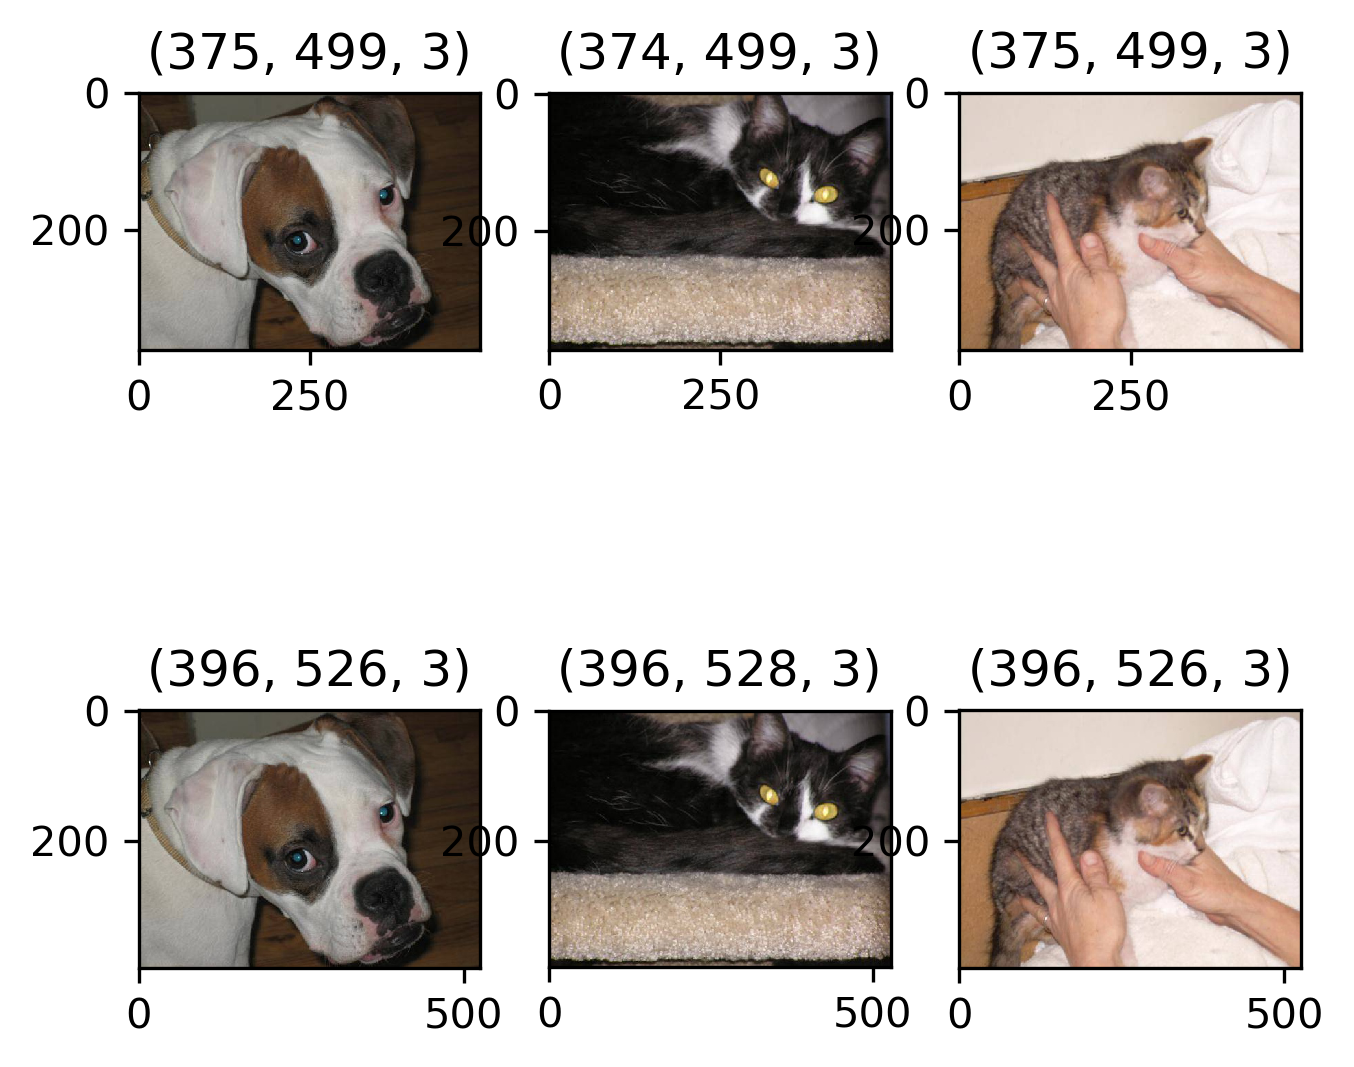

In [14]:
fig, axes = plt.subplots(2, 3, figsize = (5,5), dpi=300)

for i, ax in enumerate(axes.flatten()):
    
    if i < 3:
        img = cv2.imread(random_filenames[i])[...,::-1]
        ax.imshow(img)
        ax.set_title(img.shape)
    else:
        img = cv2.imread(new_f[i - 3])[...,::-1]
        ax.imshow(img)
        ax.set_title(img.shape)

plt.show()

In [ ]:
crop